# CPSC222 - DA7 Housing Regression Exercise

Jonathan Smoley

December 9, 2021

In [43]:
# imported libraries
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

## Data Collection/Cleaning/Preparation

Having imported the Boston Housing dataset straight from the sklearn library, I now want to look over the data and formulate it in a way that can be used in EDA and ML tasks. Calling into action the topics related to data ethics we learned this semester, the column `B` in the dataset is problematic to say the least. Therefore, the next task is the remove this feature from the dataset.

In [44]:
# load boston housing dataset
boston = load_boston()

# make dataframe containing the boston data
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.drop(['B'], axis = 1, inplace = True)

# drop rows w/ missing values
df.dropna(axis = 0, how = 'any', inplace = True)

C:\Users\jtsmo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

Next step is the separate the attribute for median home value `MEDV` to serve as the predicted feature.

In [45]:
# MEDV data separated into y variable
df['MEDV'] = boston.target

# drop MEDV from df into y variable for classification
y = df['MEDV']

## Exploratory Data Analysis
Seeing as this is a regression problem, I now want to perform a linear regression using the hold out method to find the coefficient of determination $R^{2}$. First it would be helpful to visualize the data in a correlation matrix heatmap. Thus:

In [46]:
# produce correlation matrix heatmap
corr_df = df.corr()
corr_df.style.background_gradient(cmap = 'bwr').set_precision(2)

C:\Users\jtsmo\AppData\Local\Temp/ipykernel_20132/21045016.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_df.style.background_gradient(cmap = 'bwr').set_precision(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47


It appears that the `RM` feature is highly correlated with the `MEDV` target variable. It also appears that the `PTRATIO` and `LSTAT` features are not correlated with the `MEDV` target variable.

## Build/Refine ML Models
Finally, it is time to perform regression techniques on this boston dataset. To do so, I will utilize the `sklearn.linear_model.LinearRegression` class to produce the best $R^{2}$ possible by looking at how different features correlate.

R^2: 0.6276683685321172


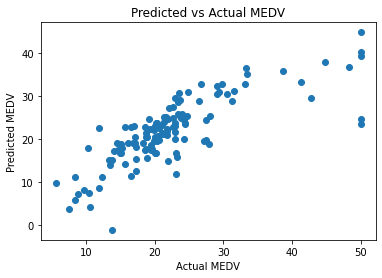

In [47]:
# drop MEDV from df as it is the target variable
df.drop(['MEDV'], axis = 1, inplace = True)

# drop to improve correlation
df.drop(['INDUS', 'AGE'], axis = 1, inplace = True)

# separate data into training and testing sets & independent/dependent variables
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.25, random_state = 0)

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('R^2:', reg.score(x_test, y_test))

# plot predicted vs actual values using scatter plot
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual MEDV')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.show()

Though the correlation matrix heatmap displayed a correlating `RM` feature and non-correlating `PTRATIO` and `LSTAT` features, removing the `INDUS` and `AGE` features produced the best $R^{2}$ value. Now, for extra reassurance, I can compare this result to that of a Decision Tree Regressor.

R^2: 0.6354364289453209


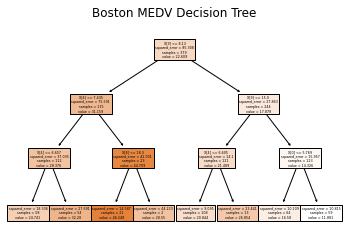

In [48]:
# produce a Decision Tree Regression model using prior training/testing sets
regressor = DecisionTreeRegressor(max_depth = 3, random_state = 0).fit(x_train, y_train)
print('R^2:', regressor.score(x_test, y_test))

# plot the decision tree
plot_tree(regressor, filled = True)
plt.title('Boston MEDV Decision Tree')
plt.show()

## Results
It appears that the coefficient of determination for the Decision Tree is greater than that of the linear regression, even though I maximized that best $R^{2}$ obtainable out of the linear regression.